In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

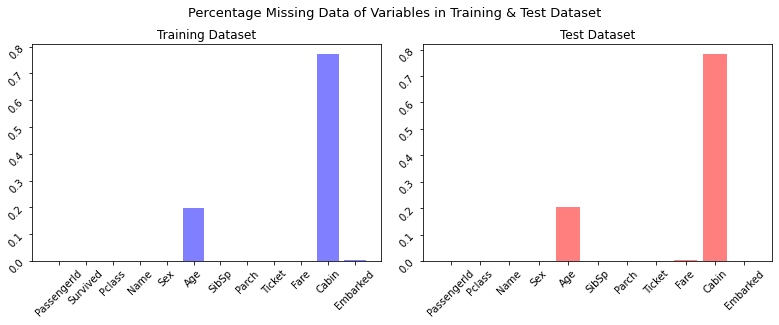

In [3]:
train_missing = train_df.isnull().sum()/train_df.shape[0]
test_missing = test_df.isnull().sum()/test_df.shape[0]


fig, (ax1, ax2) = plt.subplots(1, 2 , figsize = (11, 4))
fig.suptitle('Percentage Missing Data of Variables in Training & Test Dataset' , fontsize = 13)
fig.tight_layout(h_pad = 15)

ax1.bar(train_missing.index, train_missing, color = 'blue', alpha = .5); 
ax1.set_title('Training Dataset' );
ax1.tick_params( rotation = 45 );

ax2.bar(test_missing.index, test_missing , color = 'red' , alpha = .5); 
ax2.set_title('Test Dataset' );
ax2.tick_params( rotation = 45 );
 
plt.subplots_adjust(top=0.85)    
plt.show()    